# ANALYSIS - 1

# What causes difference in Prices of listings?

In [1]:
# Cleaning the data

import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('../data/listings.csv')
inputDF=inputDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,-71.134374,42.286241,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,t,"The room is in Roslindale, a diverse and prima...",Roslindale,...,Private room,2,1.0,1.0,1.0,1.30,"{TV,Internet,""Wireless Internet"",""Air Conditio...",moderate,36,65.0
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...",-71.135765,42.292438,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",f,The LOCATION: Roslindale is a safe and diverse...,Roslindale,...,Private room,2,1.0,1.0,1.0,0.47,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",moderate,41,65.0
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,-71.121021,42.281106,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,f,Roslindale is a lovely little neighborhood loc...,Roslindale,...,Private room,4,1.0,1.0,2.0,1.00,"{TV,Internet,""Wireless Internet"",""Air Conditio...",moderate,1,75.0
4,7651065,Come Home to Boston,"My comfy, clean and relaxing home is one block...",-71.136258,42.284512,"Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",f,"I love the proximity to downtown, the neighbor...",Roslindale,...,Private room,2,1.5,1.0,2.0,2.25,"{Internet,""Wireless Internet"",""Air Conditionin...",flexible,29,79.0
5,12386020,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,-71.131893,42.291690,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,f,We love our corner of Roslindale! For quiet wa...,Roslindale,...,Private room,2,1.0,1.0,1.0,1.70,"{""Cable TV"",""Wireless Internet"",""Air Condition...",flexible,8,75.0


In [2]:
# Categorizing differernt listings based on room_type

roomType_DF=inputDF.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

,room_type,number_Of_Listings
0,Entire home/apt,1393
1,Private room,1061
2,Shared room,52


In [6]:
#We have already seen the number of listings based upon room type.Visualizing the same will provide more clarity.

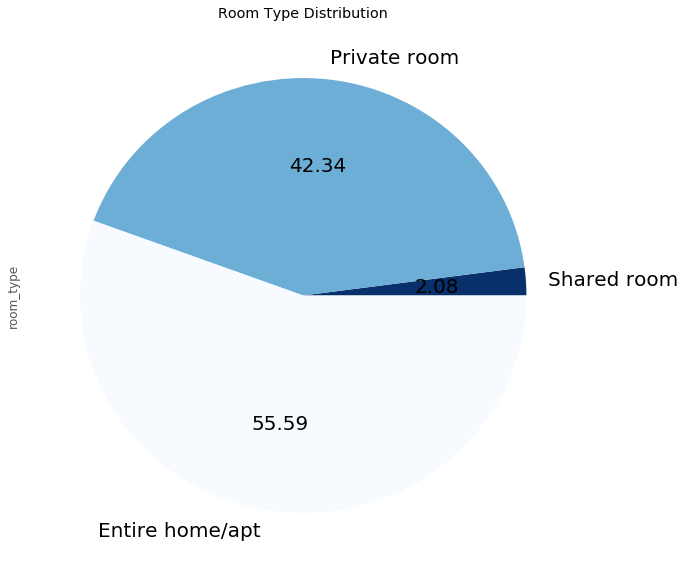

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = inputDF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

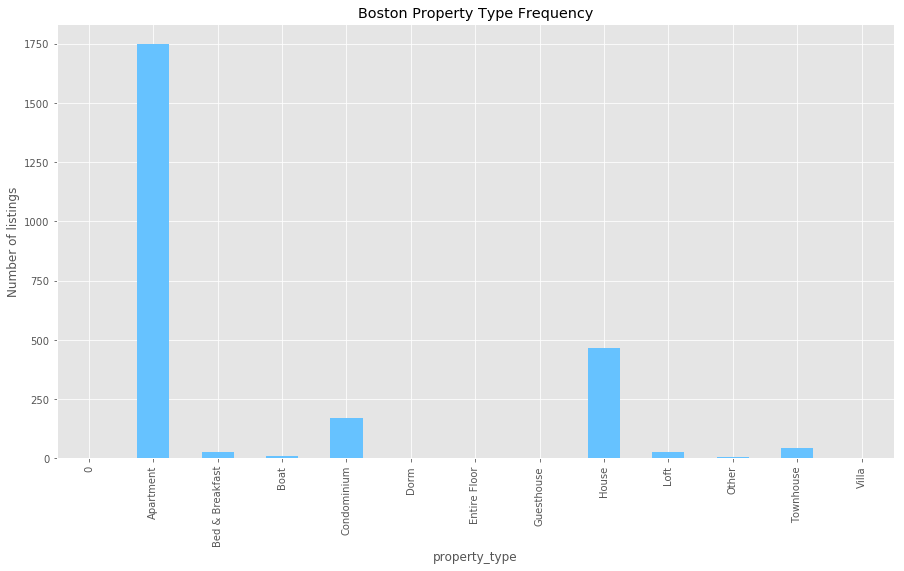

In [4]:
# Analyzing and plotting the number of listings based on their property type

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytype_DF = inputDF.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Boston Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

It can be concluded that people are more inclined towards listing their entire property than that of private rooms or shared rooms.It can also be seen that property type also plays an important factor. Not surprisingly, Apartment and houses take up an overwhelming majority of all listings, although we do see few instances unfamiliar residencies here and there.

In [5]:
# analyzing the prices for different room type and property type

roomProperty_DF = inputDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
22,Townhouse,Entire home/apt,320.800000
13,Guesthouse,Entire home/apt,289.000000
7,Boat,Private room,287.000000
14,House,Entire home/apt,286.809917
6,Boat,Entire home/apt,275.222222


In [6]:
#plotting a donut chart for the same which on hovering displays mean price for a room and a property type

from bokeh.charts import Donut, show, output_notebook

output_notebook()
inputDF=inputDF[(inputDF.property_type!=0)]
d = Donut(inputDF.groupby(['property_type','room_type']).price.mean(), hover_text='mean',width=500,height=500)
show(d)

Loading BokehJS ...

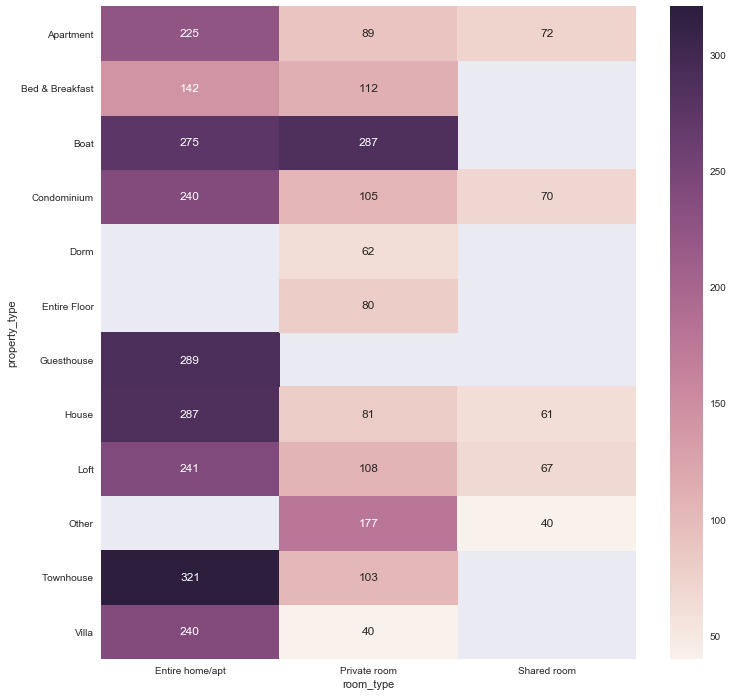

In [7]:
#Plotting the same on a heatMap

import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(inputDF.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

This chart allows us to see all the listings' prices broken down by property type and room type. This gives us a much better understanding of the price breakdown in Boston based on property and room types.
It can be analyzed that for almost all property type,prices for Entire home/apartment is the maximum.This tells us that Property type and room type plays a very important role in deciding price of a listing.
Lets see how the number of bedrooms available affects the price of a listing

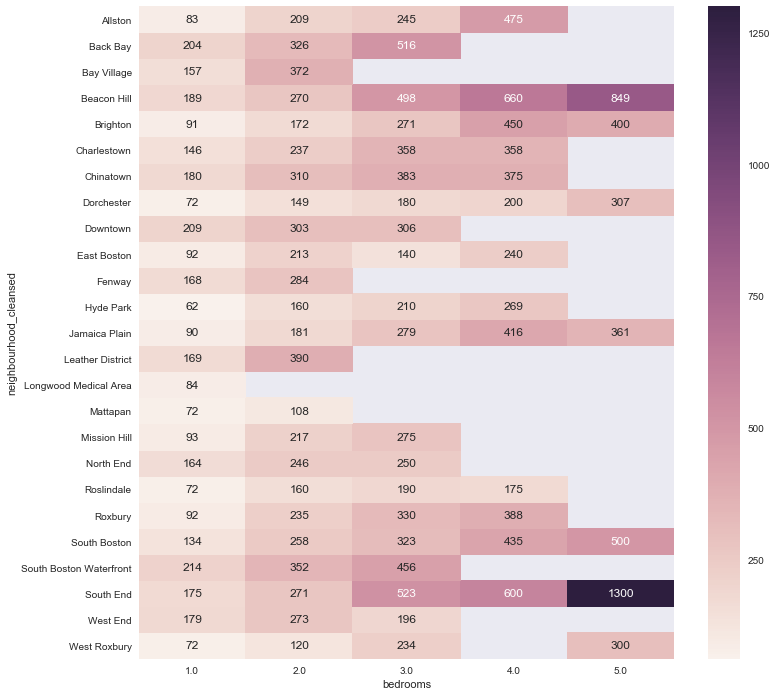

In [8]:
# HeatMap for variation of prices with number of bedrooms for listings

plt.figure(figsize=(12,12))
sns.heatmap(inputDF.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

It can be analyzed that with the increase in the number of bedrooms price of listing increases.Although, it depends upon the neighbourhood as well.

So the analysis gives us data points that the prices of listings on Airbnb depends upon the room type, property type, number of bedrooms and neighbourhood.It can be seen that the property with type as Apartment and the listing as with type as entire house with maximum number of bedooms has highest price.Although it depends upon neighbourhood as well which is analyzed in the next analysis  

Now that we've seen how property types and room types along with neighborhood can affect the listing prices, let's investigate the summary.

In [9]:
summaryDF = inputDF[['summary','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,summary,price
1022,This unique home is located in Boston's South ...,1300.0
1262,One of a kind. Just underwent a $1 mil. resto...,1250.0
3242,"2,200 sqft, 3 level, 3 bdrm, 2 bath, newly ren...",1000.0
1932,Facing the Public Garden in Boston's most eleg...,849.0
1085,Voted as the most successful AirBnb property i...,800.0


In [10]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index,row in top100DF.iterrows():
    words += row['summary']
    
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'unique home located boston south end truly vibrant'

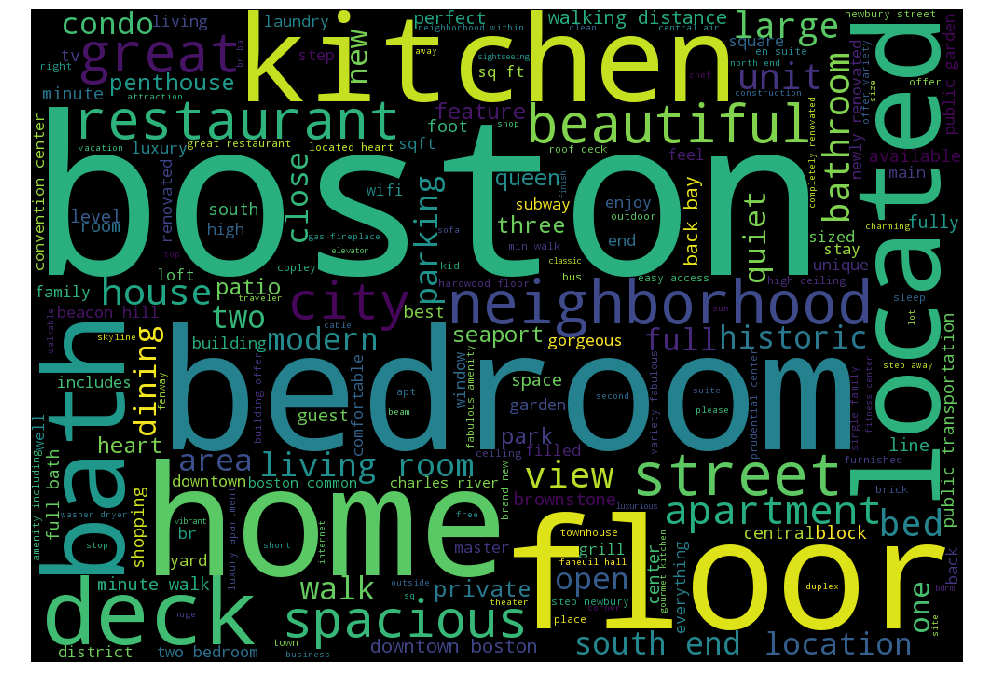

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It can be seen that unique words like home, south Boston, bedroom, floor, kitchen, restaurant, spacious, neighborhood ,located are very commonly words used when hosts are describing their homes.
This is making sense because the primary purpose of airbnb is not to provide luxury hotel suites but just a convinient place to stay.Naturally hosts understand these purposes and create their summaries based on location and requirements in order to attract as many travellers as they can.
So if hosts are not able to attract too many travellers then they can add these keywords to their summaries in order to attract travellers to choose their listings.

In [12]:
#Analyzing what amenities costs more ?
import re

amenitiesDF = inputDF[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

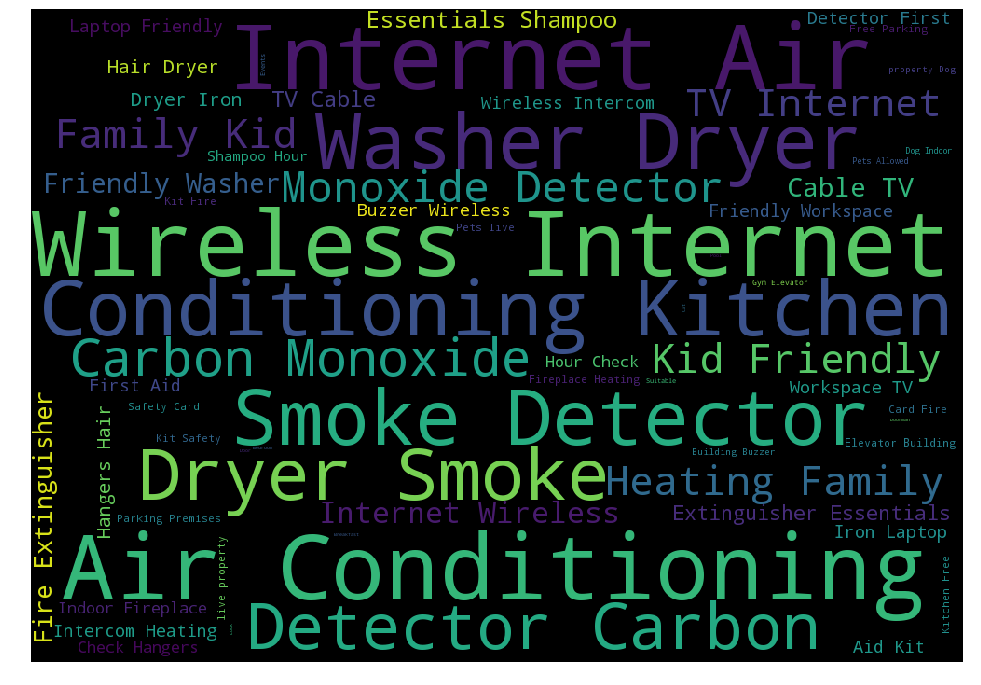

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

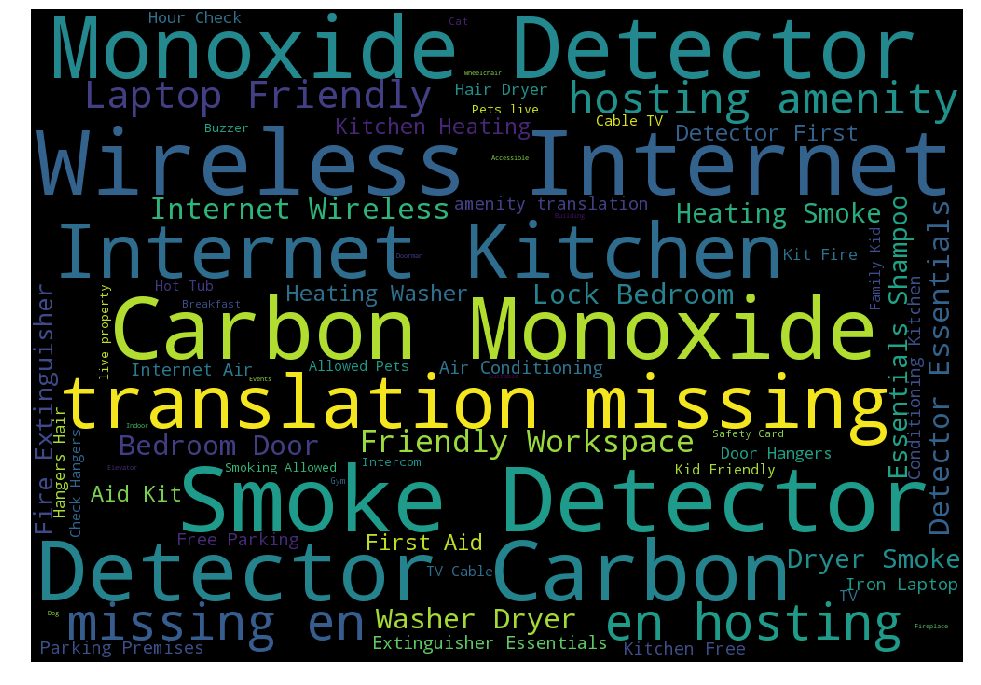

In [14]:
amenitiesDFbott =amenitiesDF.sort_values('price',ascending=[1])
amenitiesDFbottom=amenitiesDFbott.head(30)

allemenitiesb = ''
for index,row in amenitiesDFbottom.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenitiesb+=p

allemenities_datab=nltk.word_tokenize(allemenitiesb)
filtered_datab=[word for word in allemenities_datab if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_datab=[wnl.lemmatize(data) for data in filtered_datab]
allemenities_wordsb=' '.join(allemenities_datab)
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_wordsb)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It can be clearly seen that  listings with higher prices have extra eminities such as Air conditioning, washer/dryer, Kid friendly, Heating, hair dryer, buzzer and Extra emenities comes with extra prices

It can be concluded that prices of listings depends upon following factors:

1) The type of room chosen by the traveller and mostly booking an Entire property costs maximum followed by private room and shared apartment.

2) The type of property chosen by the traveller and it can be analyzed that Townhouse and houses are the properties with maximum prices and apartments, houses take up an overwhelming majority of all listings.

3) Price of a listing also depends upon the number of bedrooms the property have and the same also depends upon the neighborhood of the property

4) the summary section is the one which helps to attract travellers and analyzed that presence of unique words like home, south Boston, bedroom, floor, kitchen, restaurant, spacious, neighborhood ,located words tends to attract more travellers

5) with the increase in prices the eminities provided by host also increases.